# Welly for Well Log data analysis

#### Jaiyesh Chahar | jaiyesh0002@gmail.com

#### Linkedin: https://www.linkedin.com/in/jaiyesh-chahar-9b3642107/

#### Github: https://github.com/jaiyesh

#### Petroleum From Scratch Youtube Channel: https://www.youtube.com/channel/UC_lT10npISN5V32HDLAklsw

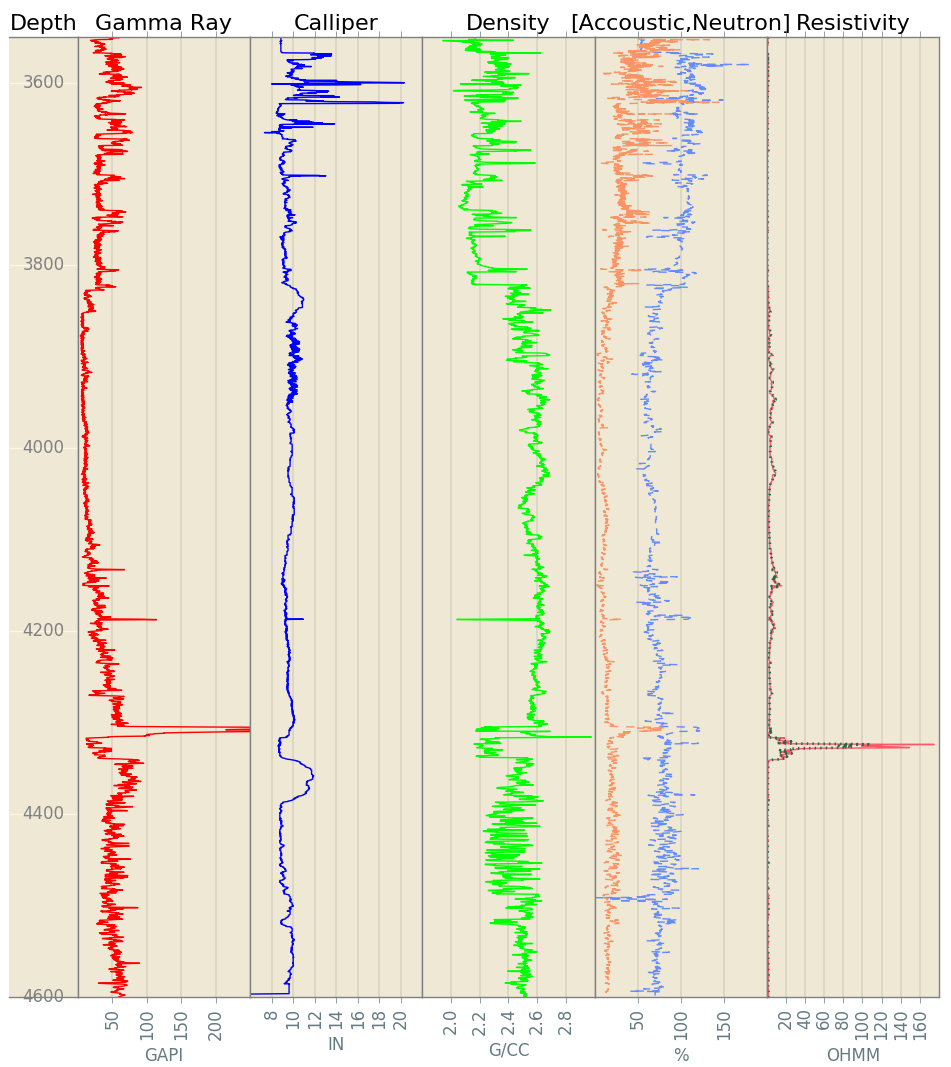

#### Importing Welly and other libraries library :

In [1]:
import welly

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading data from LAS file:
- welly.Well.from_las() is used to load data from las files

In [3]:
# Loading data from las file:
well = welly.Well.from_las('15-9-19_SR_COMP.LAS')

### header provides the basic well information from the WELL part of the file:

- company name, field name, well name etc

In [4]:
well.header

{'name': '15/9-19', 'uwi': '', 'field': 'Q15', 'company': 'STATOIL'}

In [5]:
# Count Curves: Total number of log curves 
well.count_curves()

7

In [6]:
# Well logs data in form of dictionaries
well.data

{'AC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DEN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([5.3274, 5.8235, 6.5228, ...,    nan,    nan,    nan]),
 'NEU': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP': Curve([   nan,    nan,    nan, ..., 0.8741, 0.9002, 0.9133]),
 'RMED': Curve([   nan,    nan,    nan, ..., 0.6888, 0.8902, 1.0363])}

In [7]:
#Basic information about one log
well.data['AC']

Curve([nan, nan, nan, ..., nan, nan, nan])

In [8]:
gr = well.data['GR']
gr

Curve([5.3274, 5.8235, 6.5228, ...,    nan,    nan,    nan])

In [9]:
#Reading value of log at certain depth
gr.read_at(3500)

60.34592835896433

In [10]:
gr.read_at([1001, 1003, 1004])

array([67.84736062, 75.62295985, 76.79660315])

In [11]:
#Basic stats of one curve
gr.describe()

{'samples': 29754,
 'nulls': 1637,
 'mean': 71.98679770957072,
 'min': 2.7661,
 'max': 304.3337}

In [12]:
#Starting and stopping depth
gr.start,gr.stop

(102.1568, 4636.513999998311)

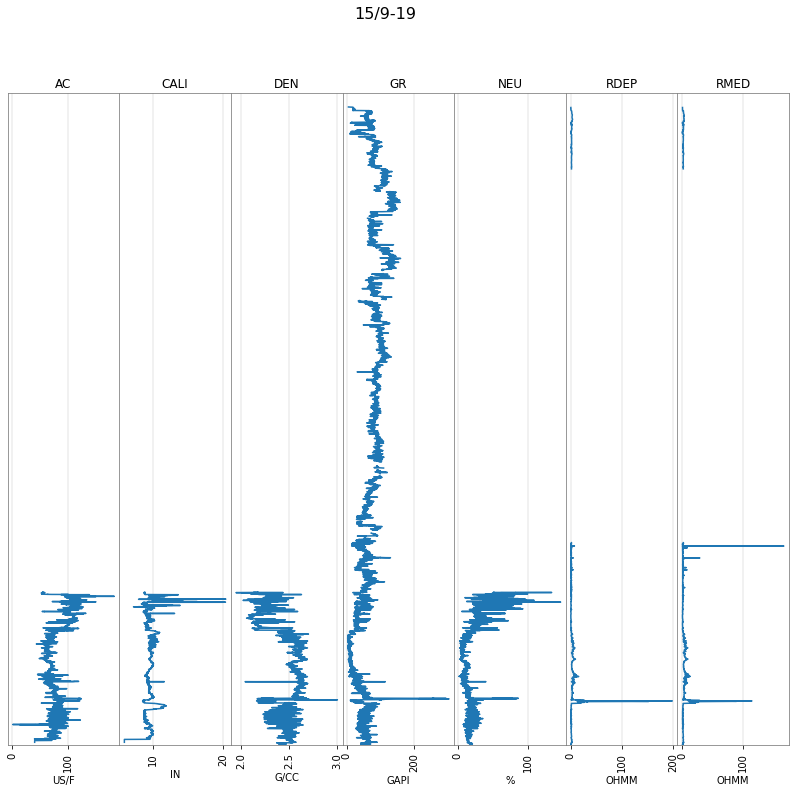

In [13]:
#plotting all data
well.plot()

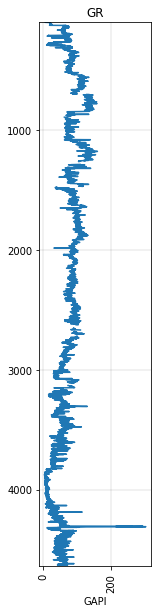

In [14]:
#Plotting a single log data
well.data['GR'].plot()

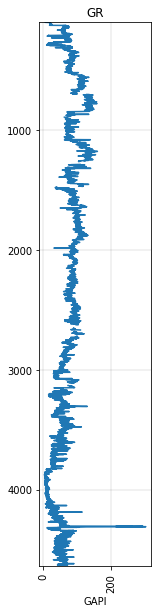

In [15]:
gr.plot()

(0.0, 200.0)

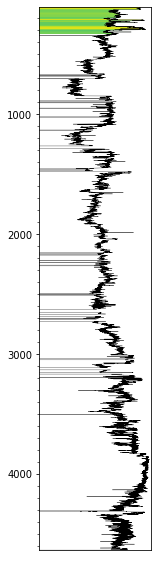

In [18]:
(200-gr).plot_2d(cmap='viridis', curve=True, lw=0.3, edgecolor='k')
plt.xlim(0,200)

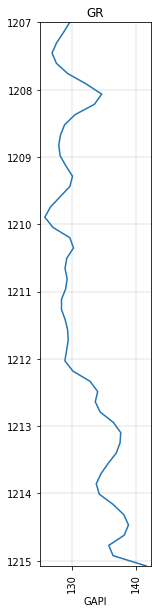

In [19]:
#Visualizing log in one certain region:
newb = gr.to_basis(start=1207, stop=1215)
newb.plot()

### Despike
- Despike with a window length for a trend. Just like time series data here we have depth wise data, and by taking data a step ahead, and see where we are getting a spike

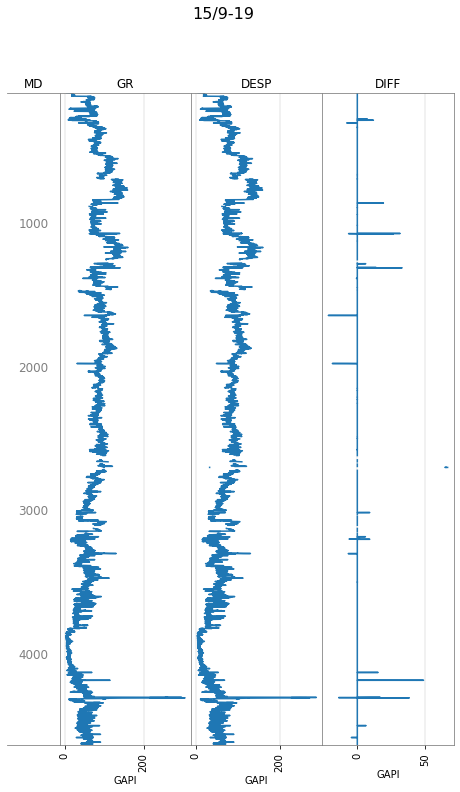

In [20]:
well.data['DESP'] = gr.despike(z=1)
well.data['DIFF'] = gr - well.data['DESP']
well.plot(tracks=['MD','GR', 'DESP', 'DIFF'])

## Plotting some datas and making groups and setting the sequence


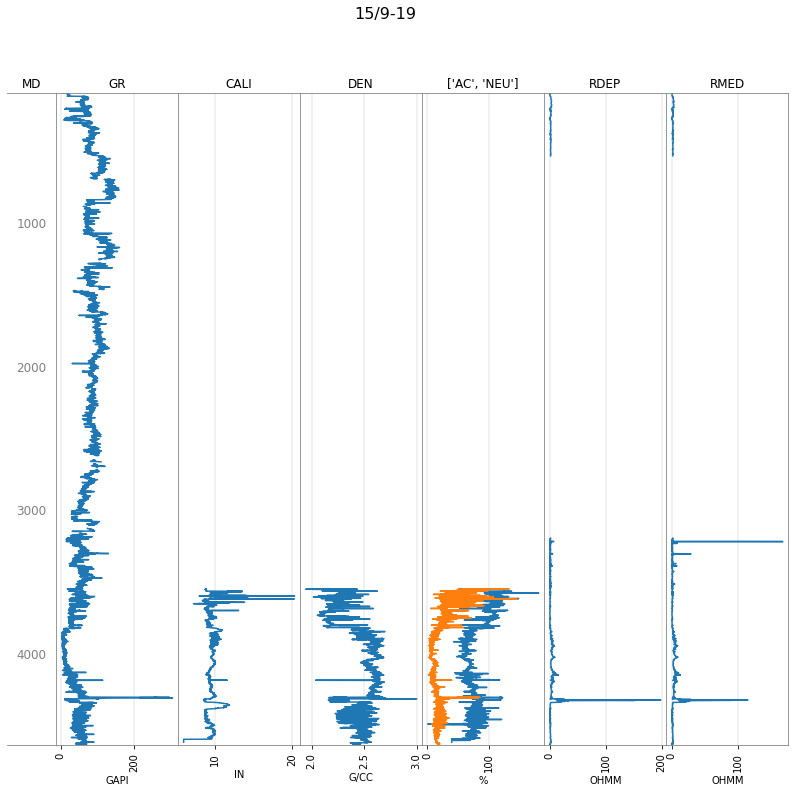

In [21]:
tracks = ['MD','GR','CALI','DEN',['AC','NEU'],'RDEP','RMED']
well.plot(tracks=tracks)


## Setting depth in curves:
- So, that we can visualize a certain portion of depth

In [42]:
# WARNING: This works in place and overwrites the logs.
well.unify_basis(start=3550.2068, stop=4600) #Here we dont have data for many logs till depth 3550, thats why lets take data from 3550 to last 

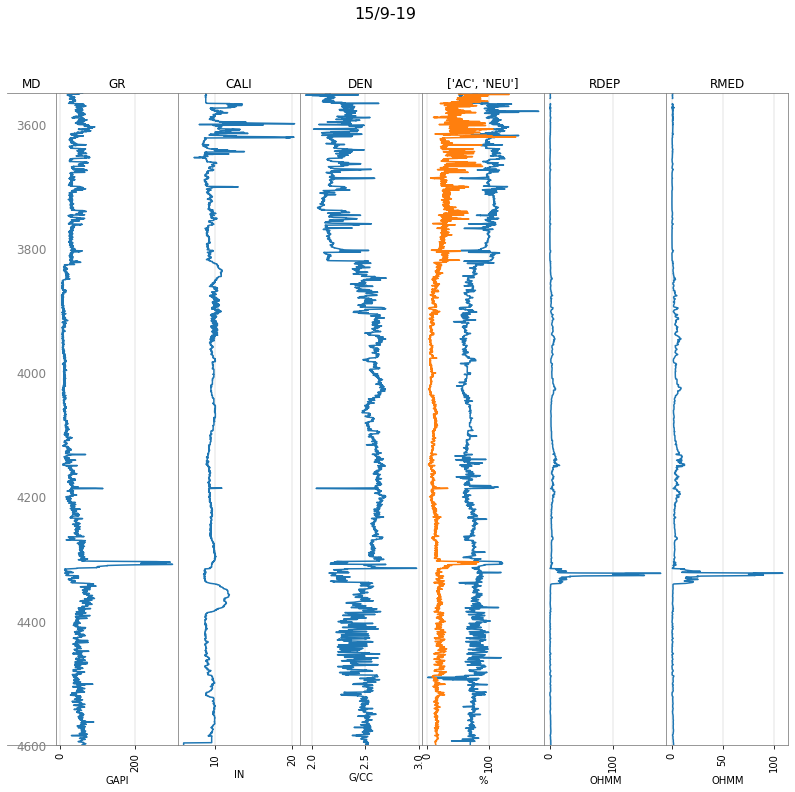

In [23]:
#Now Plotting
tracks = ['MD','GR','CALI','DEN',['AC','NEU'],'RDEP','RMED']
well.plot(tracks=tracks)

### Customizing LOGS

In [26]:
from striplog import Legend, Striplog

In [27]:
# Setting Legends so that log curves width,style,color and scale can be customised
curve_legend_csv = """colour,lw,ls,xlim,xscale,curve mnemonic
#ff0000,1.0,-,"0,250",linear,GR
blue,1.0,-,,linear,CALI
#00ff00,1.0,-,,linear,DEN
#648cfa,1.0,--,,linear,AC
#fa9464,1.0,--,,linear,NEU
#fc5866,1,-,,linear,RDEP
#23694b,2,dotted,,linear,RMED
"""
curve_legend = Legend.from_csv(text=curve_legend_csv)

In [61]:
curve_legend

hatch,xlim,xscale,ls,curve,colour,width,lw
None,"0,250",linear,-,{'mnemonic': 'gr'},#ff0000,None,1.0
None,None,linear,-,{'mnemonic': 'cali'},#0000ff,None,1.0
None,None,linear,-,{'mnemonic': 'den'},#00ff00,None,1.0
None,None,linear,--,{'mnemonic': 'ac'},#648cfa,None,1.0
None,None,linear,--,{'mnemonic': 'neu'},#fa9464,None,1.0
None,None,linear,-,{'mnemonic': 'rdep'},#fc5866,None,1.0
None,None,linear,dotted,{'mnemonic': 'rmed'},#23694b,None,2.0


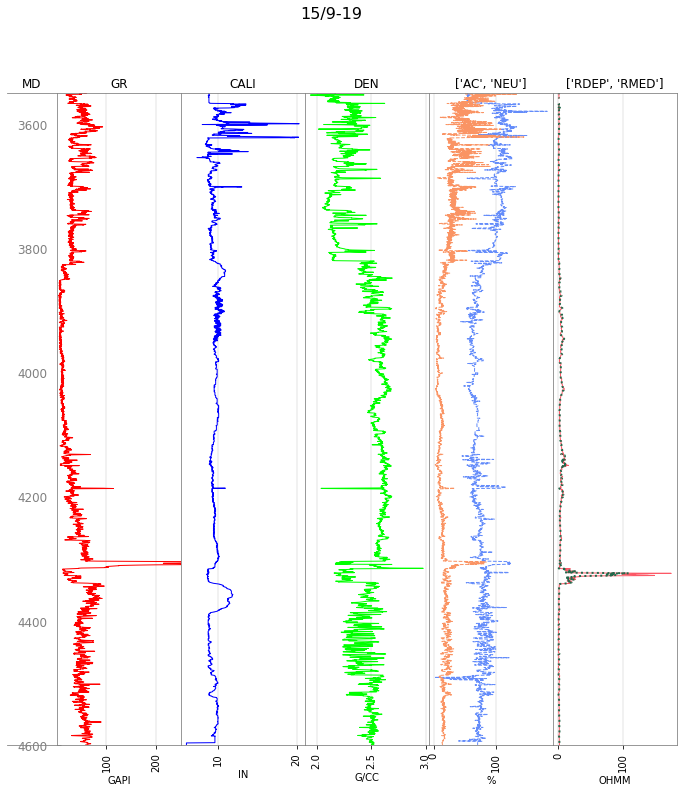

In [29]:
#Passing legend parameter value, so that values can be taken from our customised legends
well.plot(tracks=['MD', 'GR', 'CALI', 'DEN', ['AC', 'NEU'], ['RDEP', 'RMED']],legend=curve_legend)

In [56]:
#plt.style.available

In [57]:
# Changing the ploting style
plt.style.use('Solarize_Light2')

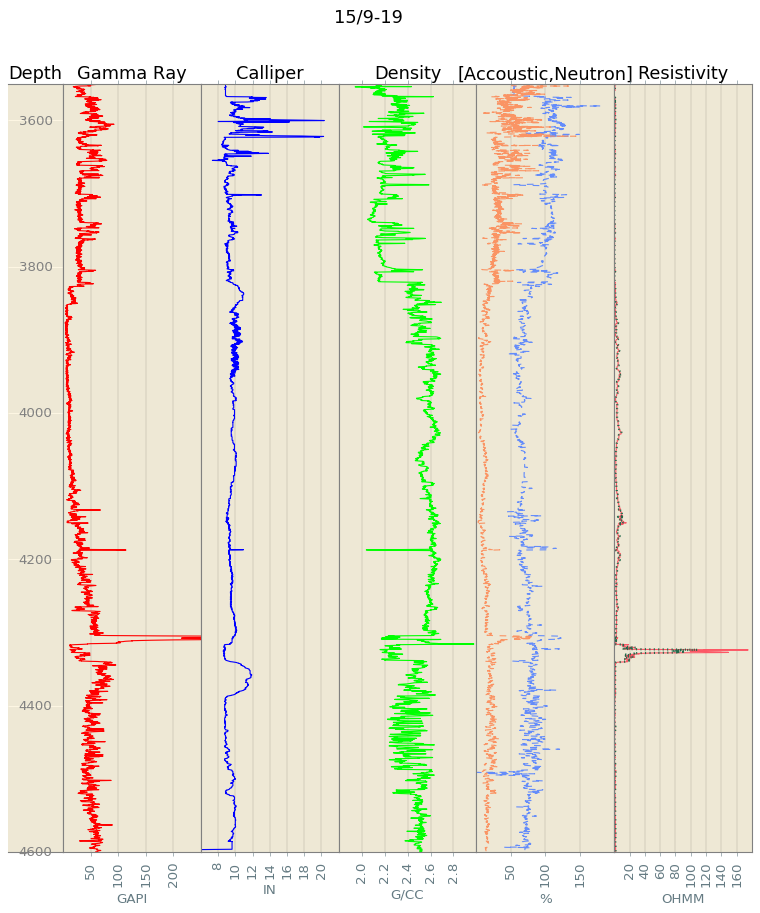

In [60]:
#Changing Track titles
track = ['MD', 'GR', 'CALI', 'DEN', ['AC', 'NEU'], ['RDEP', 'RMED']]
track_titles= ['Depth','Gamma Ray','Calliper','Density','[Accoustic,Neutron]','Resistivity']
well.plot(tracks=track,legend=curve_legend,track_titles=track_titles)
#plt.savefig('log1.png')

## Export data to pandas dataframe

- Well data can be improted from las file to pandas dataframe, from where we can perform various data manipulation operations using pandas library, also can export data to csv files

In [31]:
well = welly.Well.from_las('15-9-19_SR_COMP.LAS')
df = well.df()

In [32]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
Depth,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


In [33]:
import seaborn as sns

<AxesSubplot:ylabel='Depth'>

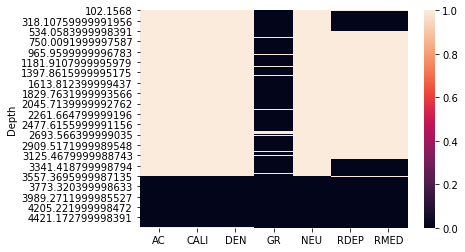

In [34]:
#Visualizing null values
sns.heatmap(df.isnull())

In [35]:
df = df.iloc[22625:]

<AxesSubplot:ylabel='Depth'>

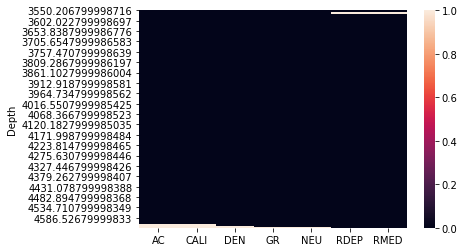

In [36]:
sns.heatmap(df.isnull())

array([<AxesSubplot:xlabel='Depth'>, <AxesSubplot:xlabel='Depth'>,
       <AxesSubplot:xlabel='Depth'>, <AxesSubplot:xlabel='Depth'>,
       <AxesSubplot:xlabel='Depth'>, <AxesSubplot:xlabel='Depth'>,
       <AxesSubplot:xlabel='Depth'>], dtype=object)

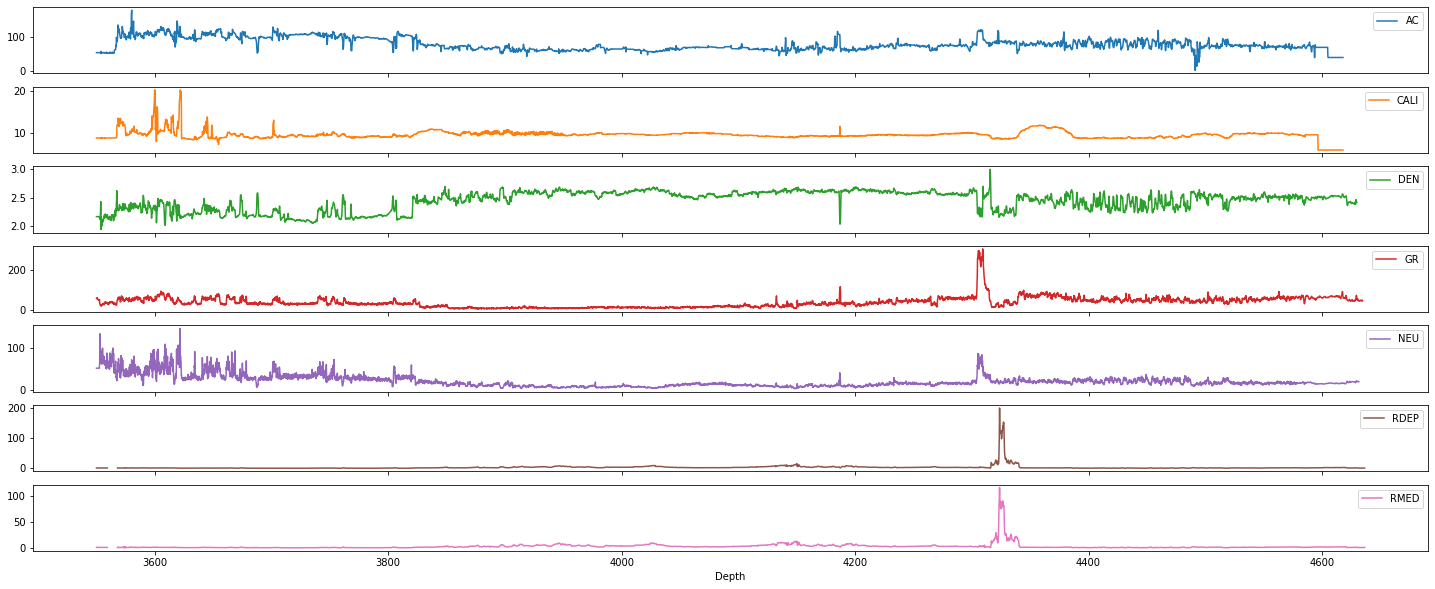

In [39]:
df.plot(subplots = True,figsize = (25,10))

## Apart from all these things, we can also add effect of deviation in logs.

-  All modern wells have a deviation survey, which is converted into a position log, giving the 3D position of the well in space.

- Welly has a simple way to add a position log in a specific format, and computes a position log from it. You can use the position log to convert between MD and TVD.

- You can see an example here: https://github.com/agile-geoscience/welly/blob/master/tutorial/05_Location.ipynb

# Happy Learning

# #